In [109]:
import pandas as pd
import numpy as np
import os
from collections import Counter
import matplotlib.pyplot as plt
import ast

In [128]:
a = pd.read_csv('fra_perfumes.csv')
a

,Name,Gender,Rating Value,Rating Count,Main Accords,Perfumers,Description,url
0,9am Afnanfor women,for women,3.73,174,"['citrus', 'musky', 'woody', 'aromatic', 'warm...",[],9ambyAfnanis a fragrance for women. Top notes ...,https://www.fragrantica.com/perfume/Afnan/9am-...
1,9am Dive Afnanfor women and men,for women and men,4.29,842,"['fruity', 'woody', 'green', 'warm spicy', 'ar...",[],9am DivebyAfnanis a Aromatic Aquatic fragrance...,https://www.fragrantica.com/perfume/Afnan/9am-...
2,9am pour Femme Afnanfor women,for women,4.00,68,"['fruity', 'musky', 'amber', 'citrus', 'powder...",[],9am pour FemmebyAfnanis a Amber fragrance for ...,https://www.fragrantica.com/perfume/Afnan/9am-...
3,9pm Afnanfor men,for men,4.50,"6,865","['vanilla', 'amber', 'warm spicy', 'cinnamon',...",[],9pmbyAfnanis a Amber Vanilla fragrance for men...,https://www.fragrantica.com/perfume/Afnan/9pm-...
4,9pm pour Femme Afnanfor women,for women,3.49,63,"['woody', 'aromatic', 'rose', 'fruity', 'powde...",[],9pm pour FemmebyAfnanis a Amber Floral fragran...,https://www.fragrantica.com/perfume/Afnan/9pm-...
...,...,...,...,...,...,...,...,...
70098,Mystique Femme Al Haramain Perfumesfor women,for women,3.83,99,"['fruity', 'fresh', 'rose', 'floral', 'sweet',...",[],Mystique FemmebyAl Haramain Perfumesis a Flora...,https://www.fragrantica.com/perfume/Al-Haramai...
70099,Mirsaal of Trust Afnanfor men,for men,4.24,406,"['amber', 'woody', 'fruity', 'warm spicy', 'mu...",[],Mirsaal of TrustbyAfnanis a Amber Spicy fragra...,https://www.fragrantica.com/perfume/Afnan/Mirs...
70100,Atifa Noir Al Haramain Perfumesfor women,for women,4.02,47,"['amber', 'warm spicy', 'sweet', 'musky', 'car...",['Christian Carbonnel'],Atifa NoirbyAl Haramain Perfumesis a Amber Van...,https://www.fragrantica.com/perfume/Al-Haramai...
70101,Matar Al Hub Al Haramain Perfumesfor women and...,for women and men,4.02,52,"['rose', 'powdery', 'amber', 'woody', 'oud', '...",[],Matar Al HubbyAl Haramain Perfumesis a Amber f...,https://www.fragrantica.com/perfume/Al-Haramai...


In [129]:
df = a.copy()
df.drop(columns = ['url','Perfumers','Description'], inplace=True)

In [130]:
# Cleaning Data
unwanted_phrases = ['for women and men','for men', 'for women']

# Function to remove unwanted phrases
def remove_phrases(name):
    if isinstance(name, str):  # Check if the value is a string
        for phrase in unwanted_phrases:
            name = name.replace(phrase, '').strip()  # Replace and strip extra spaces
    return name

In [131]:
df['Name'] = df['Name'].apply(remove_phrases)
df

,Name,Gender,Rating Value,Rating Count,Main Accords
0,9am Afnan,for women,3.73,174,"['citrus', 'musky', 'woody', 'aromatic', 'warm..."
1,9am Dive Afnan,for women and men,4.29,842,"['fruity', 'woody', 'green', 'warm spicy', 'ar..."
2,9am pour Femme Afnan,for women,4.00,68,"['fruity', 'musky', 'amber', 'citrus', 'powder..."
3,9pm Afnan,for men,4.50,"6,865","['vanilla', 'amber', 'warm spicy', 'cinnamon',..."
4,9pm pour Femme Afnan,for women,3.49,63,"['woody', 'aromatic', 'rose', 'fruity', 'powde..."
...,...,...,...,...,...
70098,Mystique Femme Al Haramain Perfumes,for women,3.83,99,"['fruity', 'fresh', 'rose', 'floral', 'sweet',..."
70099,Mirsaal of Trust Afnan,for men,4.24,406,"['amber', 'woody', 'fruity', 'warm spicy', 'mu..."
70100,Atifa Noir Al Haramain Perfumes,for women,4.02,47,"['amber', 'warm spicy', 'sweet', 'musky', 'car..."
70101,Matar Al Hub Al Haramain Perfumes,for women and men,4.02,52,"['rose', 'powdery', 'amber', 'woody', 'oud', '..."


In [7]:
df.loc[0,'Main Accords']

"['citrus', 'musky', 'woody', 'aromatic', 'warm spicy', 'lavender', 'mossy', 'fruity', 'earthy', 'white floral']"

In [47]:
# Collecting all values into a list
def extract_elements(scent_string):
    if isinstance(scent_string, str):
        # Remove square brackets and split the string by commas
        elements = scent_string.replace("[", "").replace("]", "").replace("'", "").split(", ")
        return elements
    return []

In [54]:
# Apply the function to the column and combine all elements
Mn_Acc_female = []
df[df['Gender'].isin(['for women', 'for women and men'])]['Main Accords'].apply(lambda x: Mn_Acc_female.extend(extract_elements(x)))
#df[df['Gender']== 'for women']['Main Accords'].apply(lambda x: Mn_Acc_female.extend(extract_elements(x)))

element_counts_female = Counter(Mn_Acc_female)

Mn_Acc_female = list(dict.fromkeys(Mn_Acc_female))

Mn_Acc_female = [element for element in Mn_Acc_female if element]
Mn_Acc_female
df1 = element_counts_female.most_common()

In [55]:
# Apply the function to the column and combine all elements
Mn_Acc_male = []
df[df['Gender'].isin(['for men', 'for women and men'])]['Main Accords'].apply(lambda x: Mn_Acc_male.extend(extract_elements(x)))
#df[df['Gender'] == 'for men']['Main Accords'].apply(lambda x: Mn_Acc_male.extend(extract_elements(x)))

element_counts_male = Counter(Mn_Acc_male)
Mn_Acc_male = list(dict.fromkeys(Mn_Acc_male))


Mn_Acc_male = [element for element in Mn_Acc_male if element]
Mn_Acc_male

df2 = element_counts_male.most_common()

In [59]:
df1 = pd.DataFrame(df1, columns=['Element', 'Count'])
df1['Element'] = df1['Element'].str.title()

df1.to_csv('elements_count_female.csv', index=False)

In [60]:
df2 = pd.DataFrame(df2, columns=['Element', 'Count'])
df2['Element'] = df2['Element'].str.title()

df2.to_csv('elements_count_male.csv', index=False)

In [132]:
# 1. Convert 'Rating Value' and 'Rating Count' to numeric, coercing any errors
df['Rating Value'] = pd.to_numeric(df['Rating Value'], errors='coerce')
df['Rating Count'] = pd.to_numeric(df['Rating Count'], errors='coerce')

# 2. Drop any rows with missing values in these columns
df = df.dropna(subset=['Rating Value', 'Rating Count'])
df['Gender'] = df['Gender'].str.replace('for men', 'Male')
df['Gender'] = df['Gender'].str.replace('for women', 'Female')
df['Gender'] = df['Gender'].str.replace('for women and men', 'Unisex')

In [134]:
# 3. Define a color map for Gender with specific hex color codes
color_map = {
    'Male': '#30588a',    # Blue (hex code)
    'Female': '#f5728a'  # Orange (hex code)
    #'for women and men': '#2ca02c'   # Green (hex code)
}
df['Color'] = df['Gender'].map(color_map)

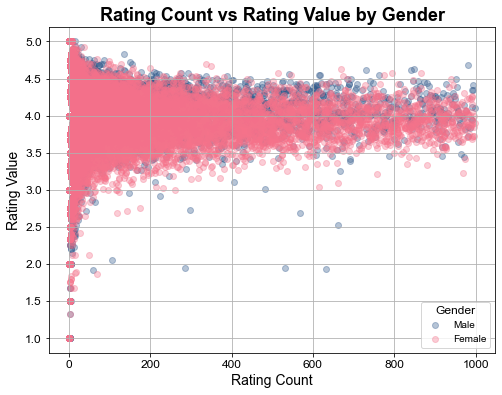

In [182]:

# Set the default font to Arial (or another font of your choice)
plt.rcParams['font.family'] = 'Arial'  # You can set it to any available font on your system
plt.rcParams['font.size'] = 12         # Adjust the default font size

# 5. Scatter plot to visualize the relationship between Rating Value and Rating Count with colors for gender
plt.figure(figsize=(8,6))

# Plot each gender separately to have different colors
for gender in color_map:
    subset = df[df['Gender'] == gender]
    plt.scatter(subset['Rating Count'], subset['Rating Value'], 
                color=color_map[gender], label=gender, alpha=0.35)

# Add plot title and labels with custom font
plt.title('Rating Count vs Rating Value by Gender', fontsize=18, fontweight='bold')
plt.xlabel('Rating Count', fontsize=14)
plt.ylabel('Rating Value', fontsize=14)

# Customize the legend and grid
plt.legend(title='Gender', title_fontsize=12, fontsize=10)
plt.grid(True)

# Show plot
plt.show()

In [137]:
# 3. Group by Gender and calculate the average Rating Value and Rating Count
gender_analysis = df.groupby('Gender').agg(
    avg_rating_value=('Rating Value', 'mean'),
    avg_rating_count=('Rating Count', 'mean'),
    total_rating_count=('Rating Count', 'sum')
).reset_index()

# Display the results
print(gender_analysis)

           Gender  avg_rating_value  avg_rating_count  total_rating_count
0          Female          3.949525        103.517106           2559771.0
1  Female and men          4.003462         79.235968           2032878.0
2            Male          3.975228         92.204203            978471.0


In [139]:
# Function to extract the first accord from the list
def extract_first_accord(accords):
    try:
        # Convert the string representation of the list to an actual list
        accords_list = ast.literal_eval(accords)
        if isinstance(accords_list, list) and len(accords_list) > 0:
            return accords_list[0]  # Return the first element
    except (ValueError, SyntaxError):
        return None  # Return None if there's an issue with conversion or no accord found

# Apply the function to the 'Main Accords' column and create a new column 'First Accord'
df['First Accord'] = df['Main Accords'].apply(extract_first_accord)

# Display the dataframe to verify
print(df[['Main Accords', 'First Accord']].head())

                                        Main Accords First Accord
0  ['citrus', 'musky', 'woody', 'aromatic', 'warm...       citrus
1  ['fruity', 'woody', 'green', 'warm spicy', 'ar...       fruity
2  ['fruity', 'musky', 'amber', 'citrus', 'powder...       fruity
3  ['vanilla', 'amber', 'warm spicy', 'cinnamon',...      vanilla
4  ['woody', 'aromatic', 'rose', 'fruity', 'powde...        woody


In [140]:
df

,Name,Gender,Rating Value,Rating Count,Main Accords,Color,First Accord
0,9am Afnan,Female,3.73,174.0,"['citrus', 'musky', 'woody', 'aromatic', 'warm...",#f5728a,citrus
1,9am Dive Afnan,Female and men,4.29,842.0,"['fruity', 'woody', 'green', 'warm spicy', 'ar...",NaN,fruity
2,9am pour Femme Afnan,Female,4.00,68.0,"['fruity', 'musky', 'amber', 'citrus', 'powder...",#f5728a,fruity
3,9pm Afnan,Male,4.50,NaN,"['vanilla', 'amber', 'warm spicy', 'cinnamon',...",#30588a,vanilla
4,9pm pour Femme Afnan,Female,3.49,63.0,"['woody', 'aromatic', 'rose', 'fruity', 'powde...",#f5728a,woody
...,...,...,...,...,...,...,...
70098,Mystique Femme Al Haramain Perfumes,Female,3.83,99.0,"['fruity', 'fresh', 'rose', 'floral', 'sweet',...",#f5728a,fruity
70099,Mirsaal of Trust Afnan,Male,4.24,406.0,"['amber', 'woody', 'fruity', 'warm spicy', 'mu...",#30588a,amber
70100,Atifa Noir Al Haramain Perfumes,Female,4.02,47.0,"['amber', 'warm spicy', 'sweet', 'musky', 'car...",#f5728a,amber
70101,Matar Al Hub Al Haramain Perfumes,Female and men,4.02,52.0,"['rose', 'powdery', 'amber', 'woody', 'oud', '...",NaN,rose


In [172]:
# Assuming your dataframe is already loaded as df

# 1. Convert 'Rating Value' and 'Rating Count' to numeric, coercing any errors
df['Rating Value'] = pd.to_numeric(df['Rating Value'], errors='coerce')
df['Rating Count'] = pd.to_numeric(df['Rating Count'], errors='coerce')


# 3. Group by Main Accords and calculate the average Rating Value and total Rating Count
accord_analysis = df.groupby(['First Accord','Gender']).agg(
    avg_r_value=('Rating Value', 'mean'),
    total_r_count=('Rating Count', 'sum')
).reset_index()

# Display the results
acc_analysis = accord_analysis.sort_values(by=['total_r_count'], ascending=False).head(60)
acc_analysis['First Accord'] = acc_analysis['First Accord'].apply(lambda x: x.title())

In [170]:
df_fav_f = acc_analysis[acc_analysis['Gender'] == 'Female'].sort_values(by = 'avg_r_value', ascending=False).reset_index(drop = 'yes')
df_fav_f.to_csv('df_fav_f.csv', index=False)

In [173]:
df_fav_m = acc_analysis[acc_analysis['Gender'] == 'Male'].sort_values(by = 'avg_r_value', ascending=False).reset_index(drop = 'yes')
df_fav_m.to_csv('df_fav_m.csv', index=False)

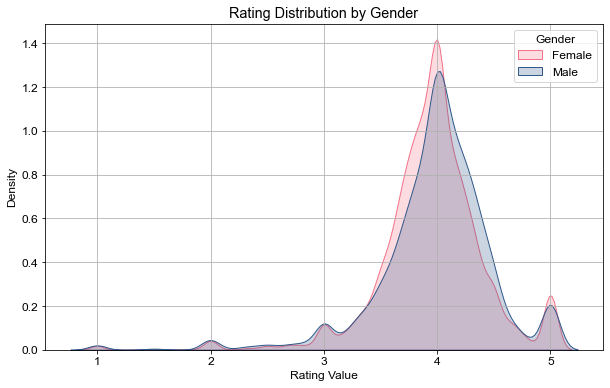

In [175]:
import seaborn as sns

# 3. Plot the distribution of ratings, separated by gender
plt.figure(figsize=(10, 6))

# Using seaborn to plot density plots for each gender category
sns.kdeplot(df[df['Gender'] == 'Female']['Rating Value'], label='Female', shade=True, color='#f5728a')
sns.kdeplot(df[df['Gender'] == 'Male']['Rating Value'], label='Male', shade=True, color='#30588a')
sns.kdeplot(df[df['Gender'] == 'Unisex']['Rating Value'], label='Unisex', shade=True, color='#2ca02c')

# Add labels and title
plt.title('Rating Distribution by Gender')
plt.xlabel('Rating Value')
plt.ylabel('Density')
plt.legend(title='Gender')

plt.grid(True)
plt.show()

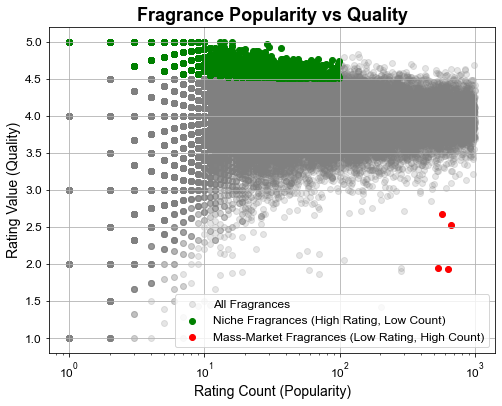

In [184]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your dataframe is already loaded as df

# 1. Convert 'Rating Value' and 'Rating Count' to numeric
df['Rating Value'] = pd.to_numeric(df['Rating Value'], errors='coerce')
df['Rating Count'] = pd.to_numeric(df['Rating Count'], errors='coerce')

# 2. Drop any rows with missing values in these columns
df_cleaned = df.dropna(subset=['Rating Value', 'Rating Count'])

# 3. Define thresholds for "niche" (high rating, low count) and "mass-market" (low rating, high count)
high_rating_threshold = 4.5  # Define what you consider a "high rating"
low_rating_threshold = 3.0   # Define what you consider a "low rating"
low_count_threshold = 100    # Define a "low count"
high_count_threshold = 500   # Define a "high count"

# 4. Identify niche (high rating, low count) fragrances
niche_fragrances = df_cleaned[(df_cleaned['Rating Value'] > high_rating_threshold) & 
                              (df_cleaned['Rating Count'] < low_count_threshold)]

# 5. Identify mass-market (low rating, high count) fragrances
mass_market_fragrances = df_cleaned[(df_cleaned['Rating Value'] < low_rating_threshold) & 
                                    (df_cleaned['Rating Count'] > high_count_threshold)]

# 6. Plot scatter plot of Rating Value vs Rating Count with niche and mass-market fragrances highlighted
plt.figure(figsize=(8, 6))

# Plot all fragrances
plt.scatter(df_cleaned['Rating Count'], df_cleaned['Rating Value'], alpha=0.2,color='gray', label='All Fragrances')

# Highlight niche fragrances
plt.scatter(niche_fragrances['Rating Count'], niche_fragrances['Rating Value'], color='green', label='Niche Fragrances (High Rating, Low Count)')

# Highlight mass-market fragrances
plt.scatter(mass_market_fragrances['Rating Count'], mass_market_fragrances['Rating Value'], color='red', label='Mass-Market Fragrances (Low Rating, High Count)')

# Add labels and title
plt.title('Fragrance Popularity vs Quality',fontsize=18, fontweight='bold')
plt.xlabel('Rating Count (Popularity)', fontsize=14)
plt.ylabel('Rating Value (Quality)', fontsize=14)
plt.legend()
plt.xscale('log')  # Use a log scale for the count to better visualize the distribution
plt.grid(True)

plt.show()


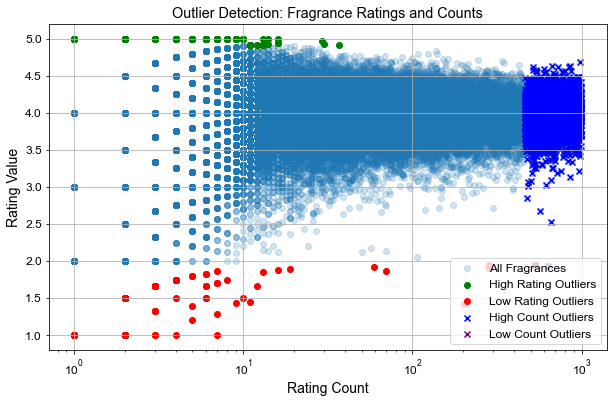

In [183]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your dataframe is already loaded as df

# 1. Convert 'Rating Value' and 'Rating Count' to numeric
df['Rating Value'] = pd.to_numeric(df['Rating Value'], errors='coerce')
df['Rating Count'] = pd.to_numeric(df['Rating Count'], errors='coerce')

# 2. Drop any rows with missing values in these columns
df_cleaned = df.dropna(subset=['Rating Value', 'Rating Count'])

# 3. Define thresholds for high/low ratings and unusual counts
high_rating_threshold = 4.9
low_rating_threshold = 2.0
high_count_threshold = df_cleaned['Rating Count'].quantile(0.95)  # Top 5% by rating count
low_count_threshold = df_cleaned['Rating Count'].quantile(0.05)   # Bottom 5% by rating count

# 4. Identify outliers in ratings
high_rating_outliers = df_cleaned[df_cleaned['Rating Value'] > high_rating_threshold]
low_rating_outliers = df_cleaned[df_cleaned['Rating Value'] < low_rating_threshold]

# 5. Identify outliers in rating counts
high_count_outliers = df_cleaned[df_cleaned['Rating Count'] > high_count_threshold]
low_count_outliers = df_cleaned[df_cleaned['Rating Count'] < low_count_threshold]

# 6. Plot scatter plot with outliers highlighted
plt.figure(figsize=(10, 6))

# Plot all fragrances
plt.scatter(df_cleaned['Rating Count'], df_cleaned['Rating Value'], alpha=0.2, label='All Fragrances')

# Highlight high rating outliers
plt.scatter(high_rating_outliers['Rating Count'], high_rating_outliers['Rating Value'], color='green', label='High Rating Outliers')

# Highlight low rating outliers
plt.scatter(low_rating_outliers['Rating Count'], low_rating_outliers['Rating Value'], color='red', label='Low Rating Outliers')

# Highlight high count outliers
plt.scatter(high_count_outliers['Rating Count'], high_count_outliers['Rating Value'], color='blue', marker='x', label='High Count Outliers')

# Highlight low count outliers
plt.scatter(low_count_outliers['Rating Count'], low_count_outliers['Rating Value'], color='purple', marker='x', label='Low Count Outliers')

# Add labels and title
plt.title('Outlier Detection: Fragrance Ratings and Counts')
plt.xlabel('Rating Count', fontsize=14)
plt.ylabel('Rating Value', fontsize=14)
plt.legend()
plt.xscale('log')  # Log scale for better visualization of count distribution
plt.grid(True)

plt.show()